# Voice Based Health Classification
## EDA And Predictive Modeling

This notebook includes exploratory data analysis (EDA), data preparation, feature engineering and training of three machine learning models to predict the health status of patients based on voice audio data provided in a .csv file.

In [89]:
#pip install xgboost
#pip install ydata-profiling

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

Loading the csv file from the current working directory.

In [92]:
df = pd.read_csv("VowelA_High_latest.csv")

In [93]:
df.head(3)

,Unnamed: 0,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,ID,G,A
0,0,1-a_h.wav,0.127341,0.355538,1587.507015,2002.198851,2737.971816,0.066798,-233.566208,48.504421,...,-28.190628,1.143172,4.134034,52.794827,39.092403,49.037060,Healthy,1,w,20
1,1,10-a_h.wav,0.215317,0.250342,1272.900724,1850.302841,1692.919922,0.043325,-179.419601,119.705742,...,7.790230,-7.037875,-9.193601,11.183559,-2.173607,-9.420938,Healthy,10,w,22
2,2,100-a_h.wav,0.212512,0.251419,919.203795,1014.718104,1275.967478,0.047079,-209.186188,167.135651,...,-20.040691,-4.153456,-2.725145,-10.669723,-2.336876,7.741264,Healthy,100,m,66


In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2035.0,1017.000000,587.598219,0.000000,508.500000,1017.000000,1525.500000,2034.000000
chroma_stft,2035.0,0.226609,0.065532,0.120402,0.182932,0.213884,0.251294,0.614178
rmse,2035.0,0.192420,0.064474,0.015067,0.147187,0.186241,0.231145,0.463574
spectral_centroid,2035.0,1316.674901,401.289370,566.319248,1056.073776,1233.786591,1468.926577,4295.111712
spectral_bandwidth,2035.0,1684.033835,434.532199,830.011306,1376.519591,1592.463814,1905.480356,3403.279259
rolloff,2035.0,2092.416751,1243.021777,698.962823,1311.850933,1627.910156,2419.182517,8581.931440
zero_crossing_rate,2035.0,0.054684,0.020236,0.012267,0.043071,0.053438,0.063741,0.271903
mfcc1,2035.0,-204.067168,46.305767,-364.190887,-233.579994,-206.244324,-176.142578,5.806334
mfcc2,2035.0,126.722018,30.334038,34.765537,105.017399,125.547623,147.534126,231.070160
mfcc3,2035.0,-22.393496,26.034214,-98.049812,-40.443611,-22.962688,-4.733893,62.088444


In [95]:
pivot_counts = pd.pivot_table(df, values='A', index='label', columns='G',
               aggfunc='count',margins=True, margins_name='Total')

# Calculate percentage of row total (excluding the 'Total' row)
pivot_percent = pivot_counts.div(pivot_counts['Total'], axis=0) * 100

# Keep 'Total' row as 100% for clarity
pivot_percent.loc['Total'] = (pivot_counts.loc['Total'] / pivot_counts.loc['Total']['Total']) * 100

# Round for neatness
pivot_percent = pivot_percent.round(2)

print("Counts:")
print(pivot_counts)
print("\nPercent of Row Total:")
print(pivot_percent)

Counts:
G            m     w  Total
label                      
Healthy    259   428    687
Unhealthy  621   727   1348
Total      880  1155   2035

Percent of Row Total:
G              m      w  Total
label                         
Healthy    37.70  62.30  100.0
Unhealthy  46.07  53.93  100.0
Total      43.24  56.76  100.0


## Insights
Number of unhealthy individuals (1348) exceeds the number of healthy ones (687).

Women are more frequently (57%) found in the data than men (43%). While the gender is almost equally distributed in the unhealthy patients,
there are far more healthy women (62%) than healthy men records (38%).

Median age 42, majority of speakers between 24–59 years, range from 9 to 94 years.

In [96]:
df.isnull().sum()

Unnamed: 0            0
filename              0
chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label                 0
ID                    0
G                     0
A                     0
dtype: int64

No null values detected.

In [97]:
# Renaming of columns and encoding of 'G' and 'Label'
df["is_w"] = df["G"] == "w"
df["is_healthy"] = df["label"] == "Healthy"
df.rename(columns={"A": "age"}, inplace=True)

| **Feature**            | **Meaning / Description**                                                                                                                                                                                                                      |
| ---------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **filename**           | The name of the audio file from which the features were extracted (e.g., `1-a_h.wav`).          |
| **chroma_stft**        | *Chroma Short-Time Fourier Transform* — captures the energy distribution across the 12 pitch classes (C, C#, D, etc.), representing harmonic or tonal characteristics of sound.                                                                |
| **rmse**               | *Root Mean Square Energy* — measures the loudness or energy of the audio signal. Higher values = louder segments.  |
| **spectral_centroid**  | Indicates where the "center of mass" of the spectrum is located. Higher values correspond to brighter (higher-pitched) sounds.                                                                                                                 |
| **spectral_bandwidth** | Measures the spread of the spectrum around its centroid — how wide the range of frequencies is. Larger values indicate more complex or noisy signals.                                                                                          |
| **rolloff**            | *Spectral roll-off frequency* — the frequency below which a certain percentage (usually 85–90%) of the signal energy is contained. Used to distinguish between harmonic and noisy sounds.                                                      |
| **zero_crossing_rate** | The rate at which the signal changes sign (from positive to negative or vice versa). Indicates noisiness or percussiveness — higher for unvoiced sounds.                                                                                       |
| **mfcc1 – mfcc20**     | *Mel-Frequency Cepstral Coefficients (MFCCs)* — numerical descriptors that capture the timbre (tone quality) of sound. Commonly used in speech and audio classification. Each coefficient represents a specific frequency band characteristic. |
| **ID**                 | A unique identifier for each audio sample or speaker.              |
| **is_w**               | Gender column 1 is Woman, 0 is Man           |
| **age**                | Represents the *Age* of the individual whose voice was recorded.                             |
| **is_healthy**          | Target variable - "Healthy" or "Unhealthy                                        |

# Correlation

In [98]:
corr_matrix = df.select_dtypes(include='number').corr()

<Axes: >

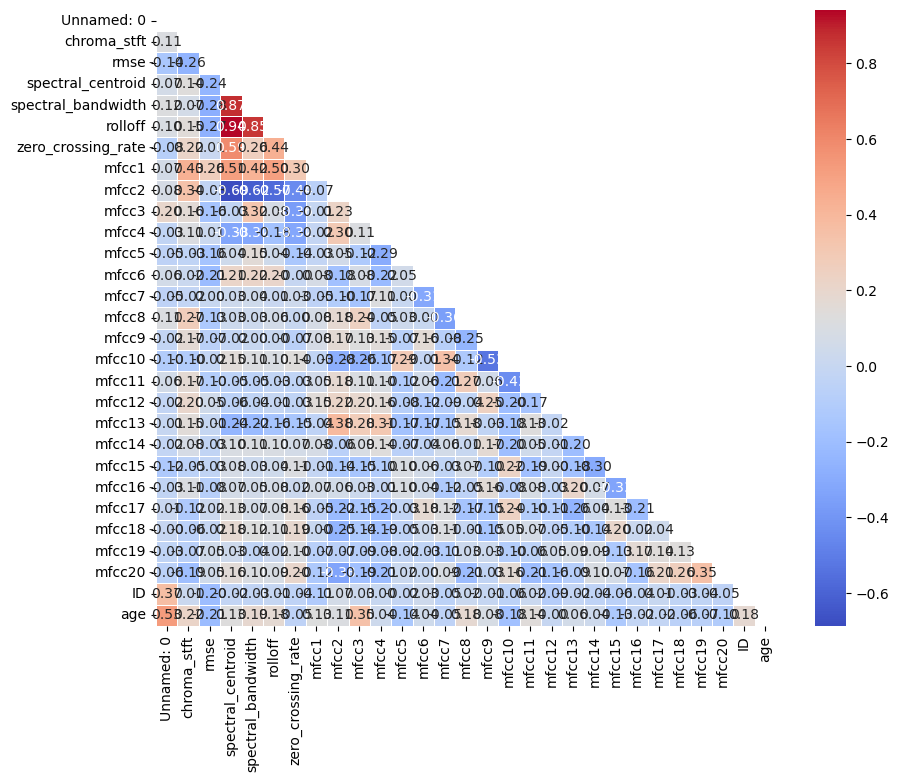

In [99]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure with increased size
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


In [100]:
# Drop redundant columns and highly correlated columns
df.drop(['Unnamed: 0', 'ID', 'G','mfcc9','mfcc2','rolloff','spectral_centroid'], axis=1, inplace=True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            2035 non-null   object 
 1   chroma_stft         2035 non-null   float64
 2   rmse                2035 non-null   float64
 3   spectral_bandwidth  2035 non-null   float64
 4   zero_crossing_rate  2035 non-null   float64
 5   mfcc1               2035 non-null   float64
 6   mfcc3               2035 non-null   float64
 7   mfcc4               2035 non-null   float64
 8   mfcc5               2035 non-null   float64
 9   mfcc6               2035 non-null   float64
 10  mfcc7               2035 non-null   float64
 11  mfcc8               2035 non-null   float64
 12  mfcc10              2035 non-null   float64
 13  mfcc11              2035 non-null   float64
 14  mfcc12              2035 non-null   float64
 15  mfcc13              2035 non-null   float64
 16  mfcc14

## Exploratory Data Analysis (EDA)

In [102]:
#Using pandas ydata profiler

"""
profile = ProfileReport(df, title="Audio Data")
profile.to_notebook_iframe()
profile.to_file("audio_data.html")
"""

'\nprofile = ProfileReport(df, title="Audio Data")\nprofile.to_notebook_iframe()\nprofile.to_file("audio_data.html")\n'

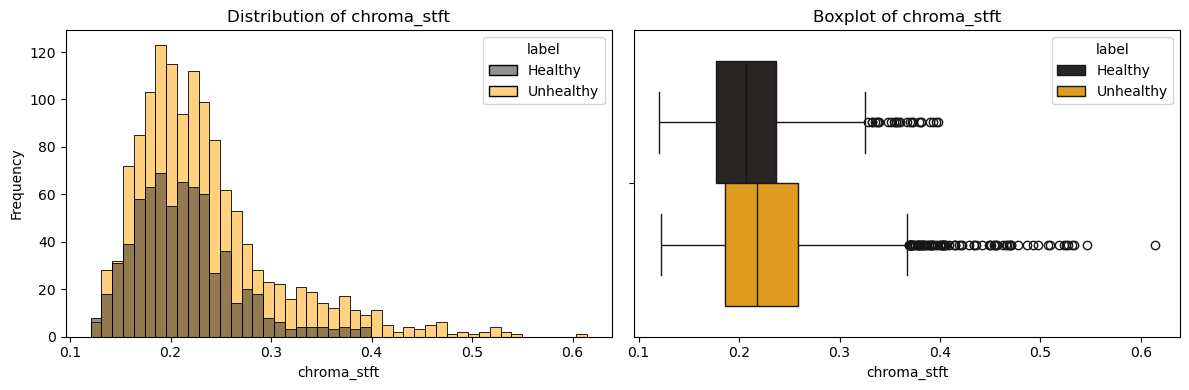

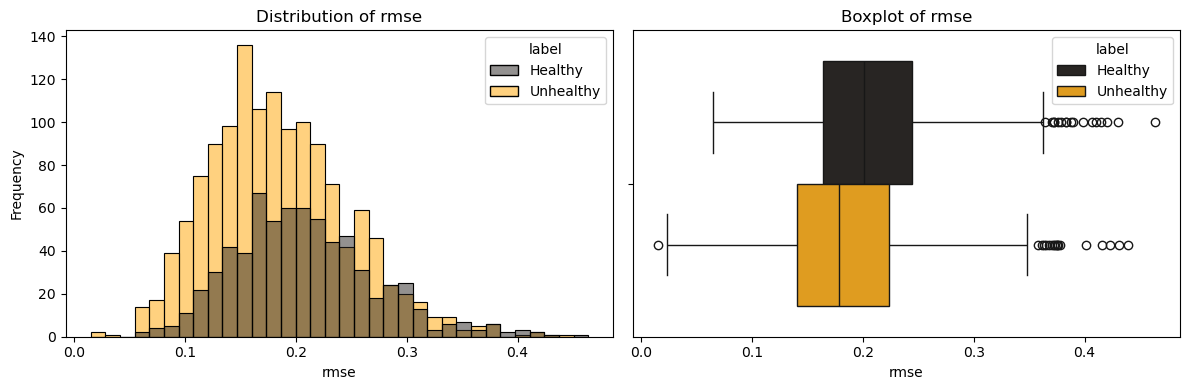

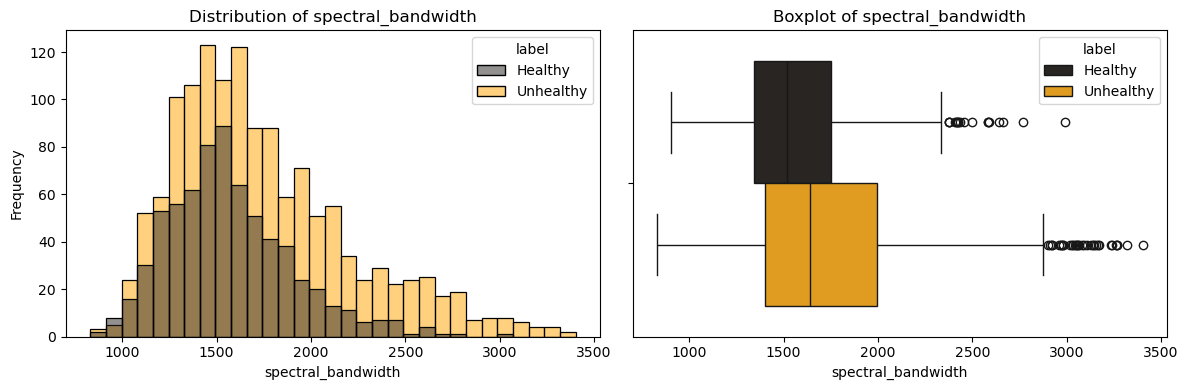

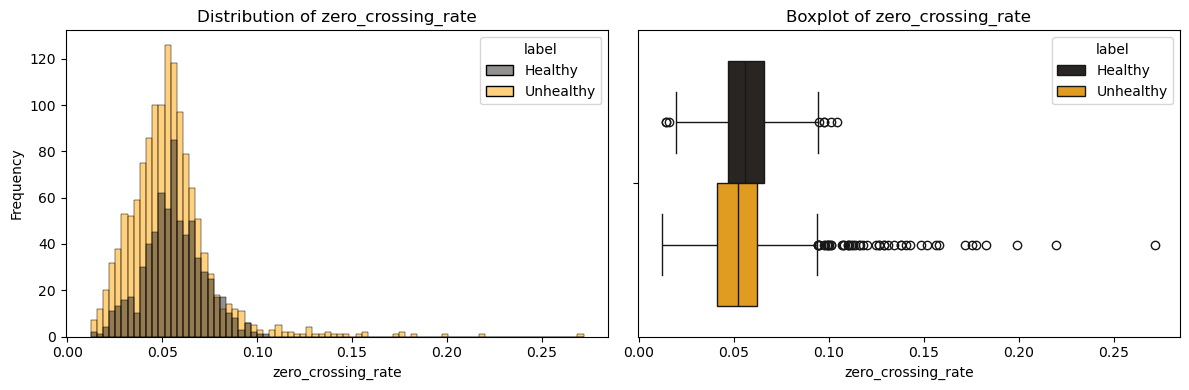

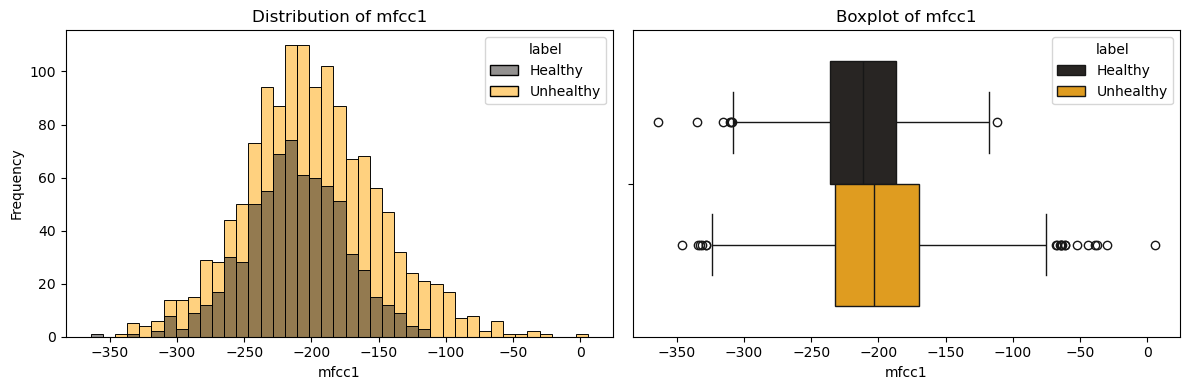

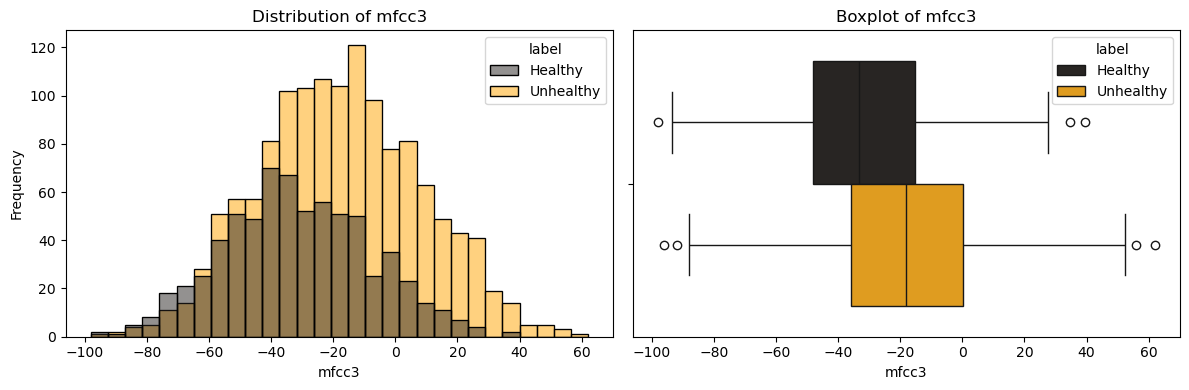

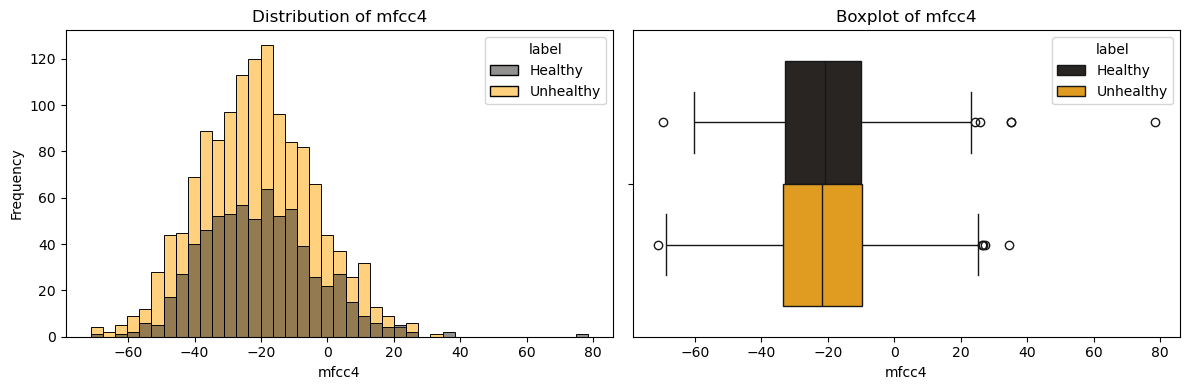

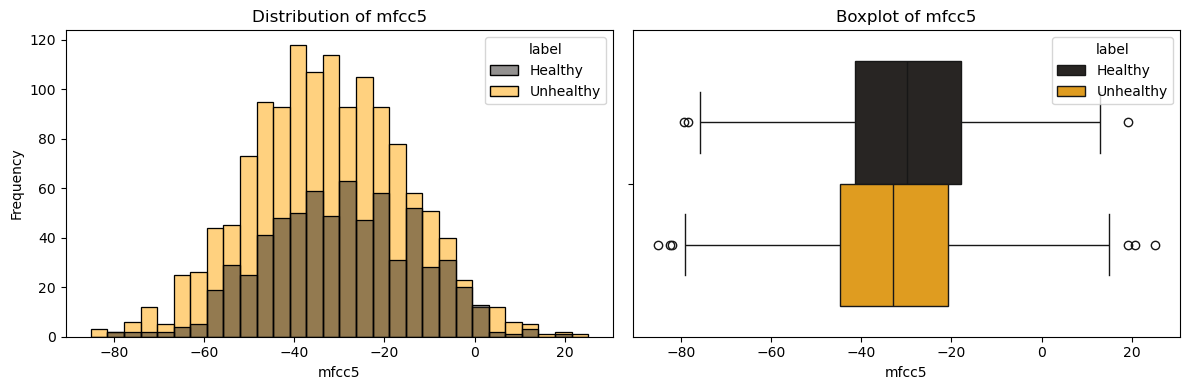

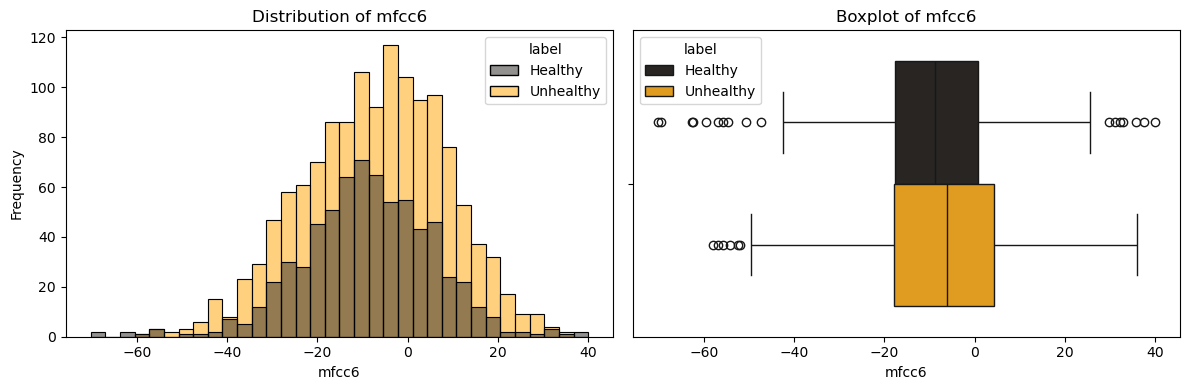

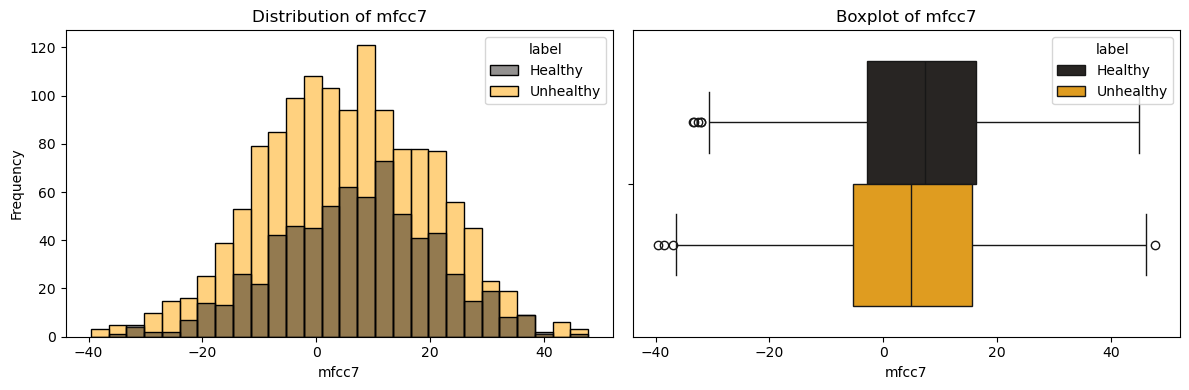

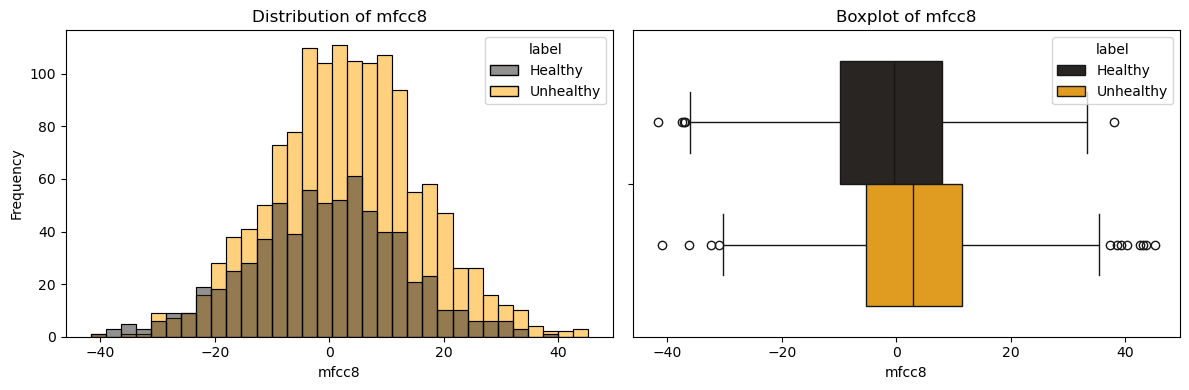

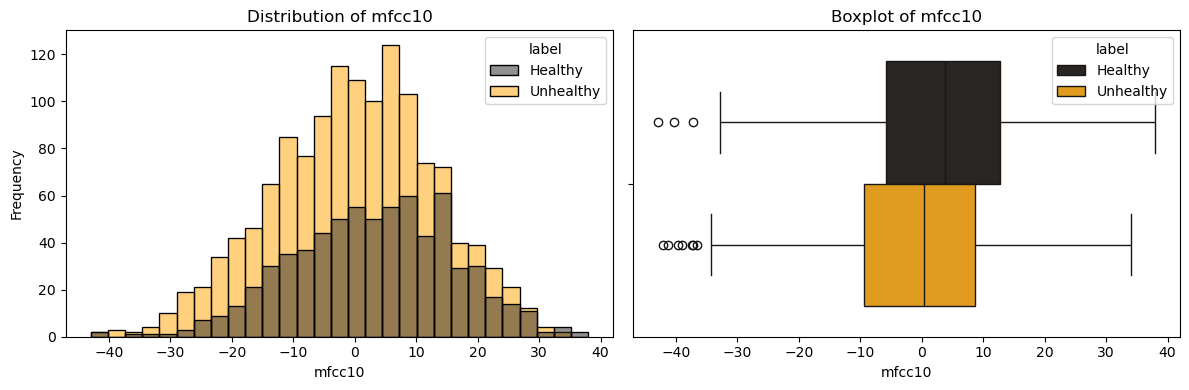

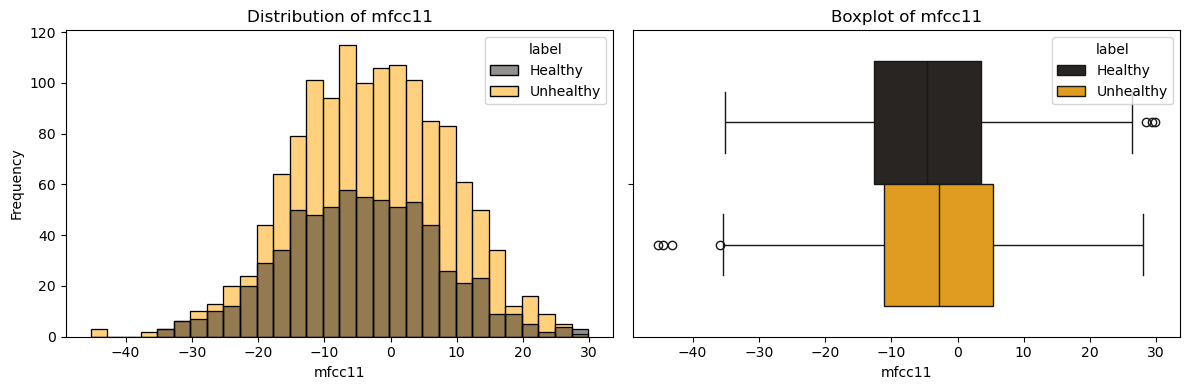

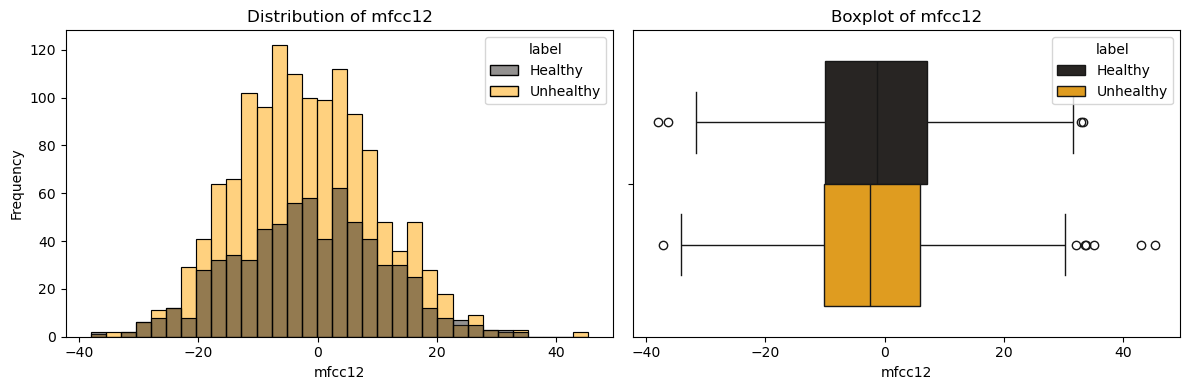

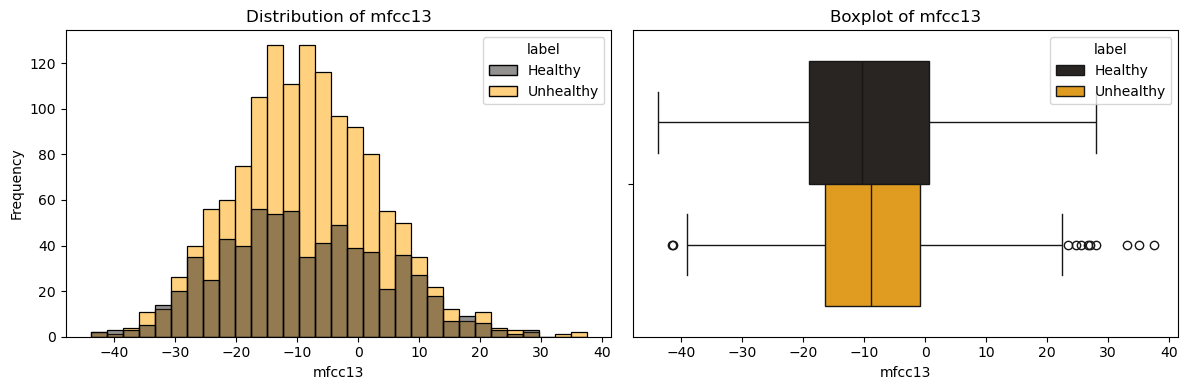

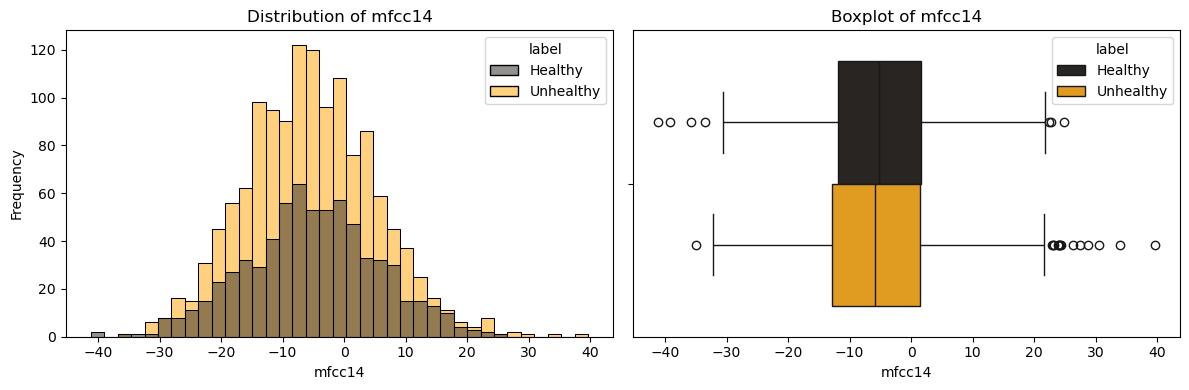

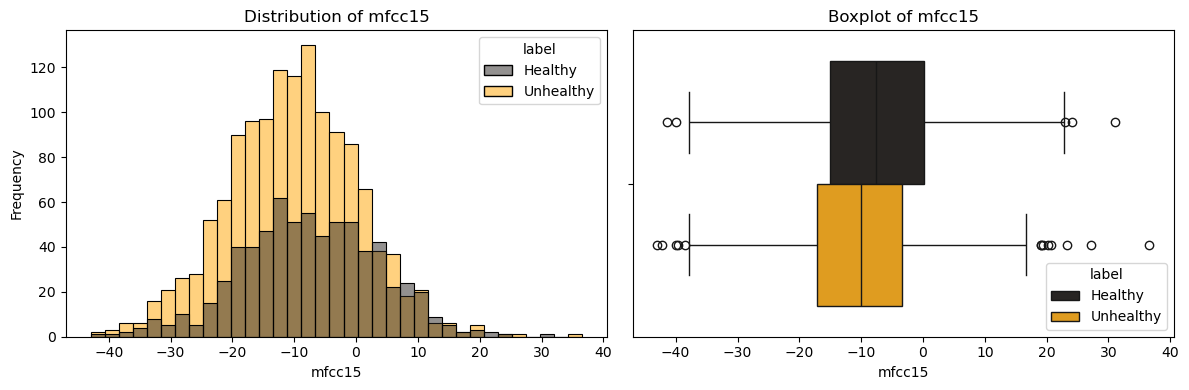

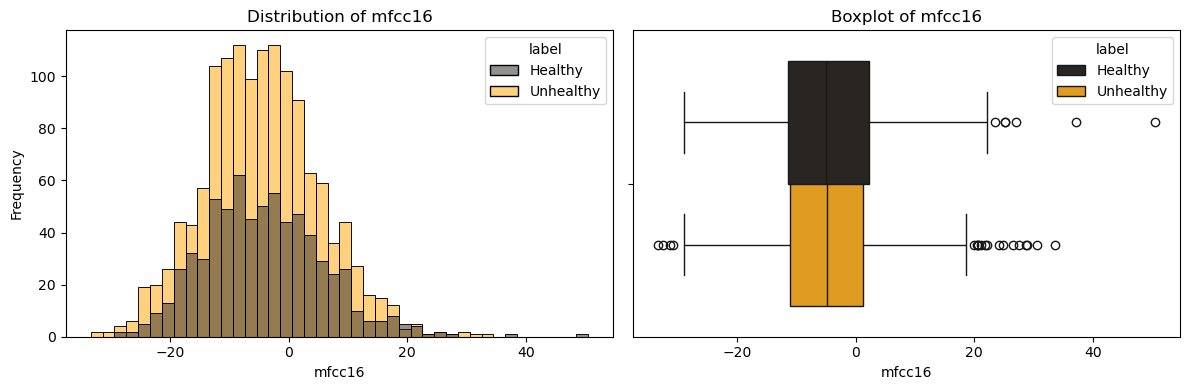

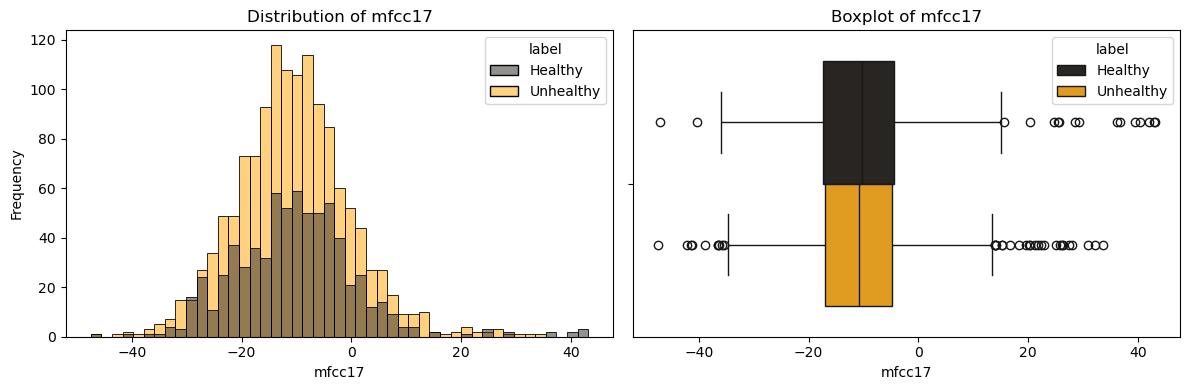

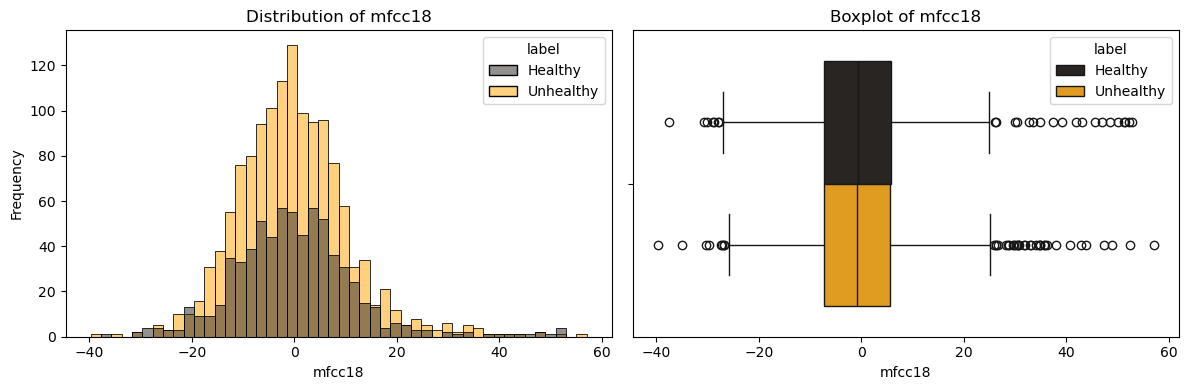

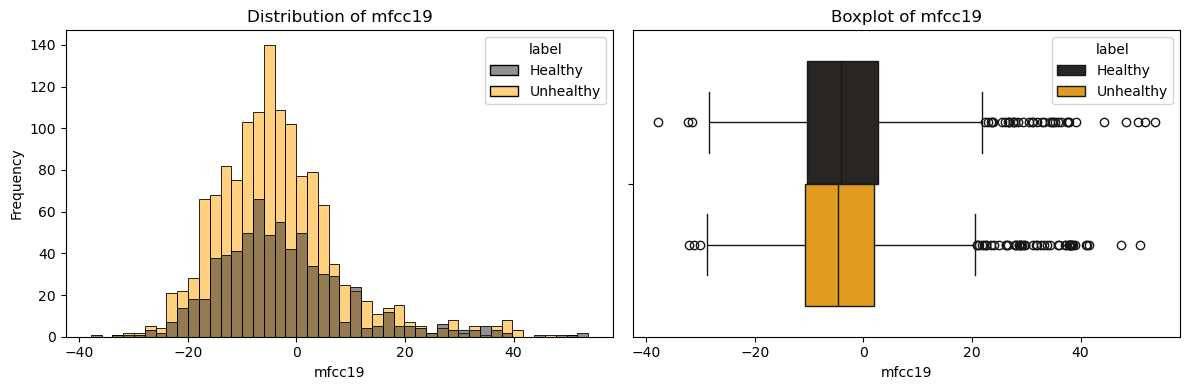

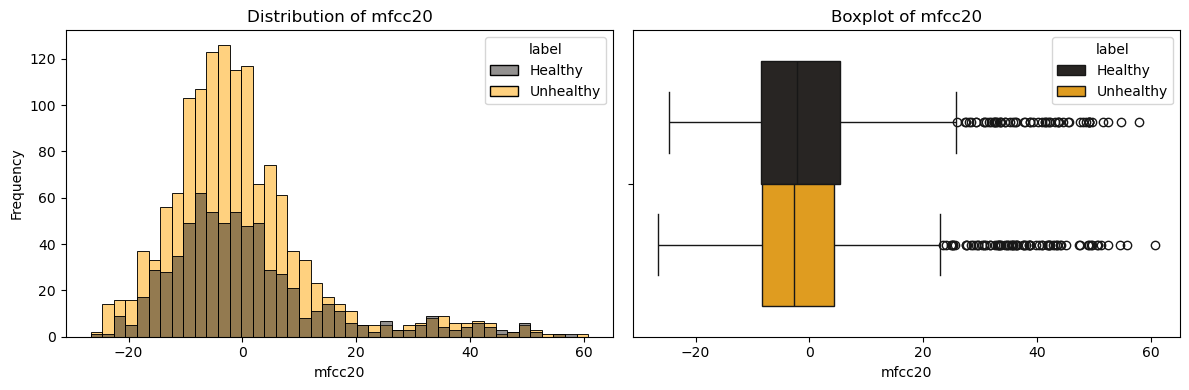

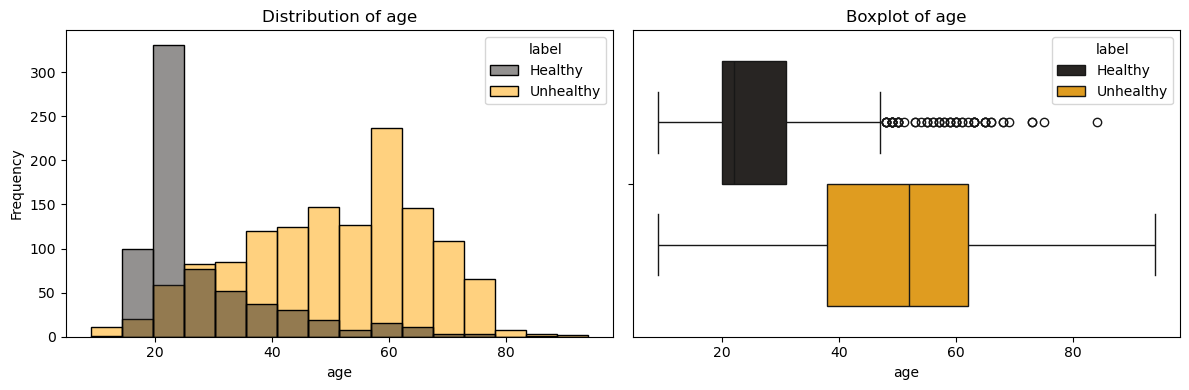

In [111]:
# Select numerical columns
num_cols = df.select_dtypes(include='number').columns

# Univariate plots for each numerical column
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(data=df, x=col, palette='dark:orange', hue='label', ax=axes[0])
    axes[0].set_title(f'Distribution of {col}', fontsize=12)
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(data=df, x=col, palette='dark:orange',hue='label', ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}', fontsize=12)
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()

# Modelling

In [81]:

#Step 1: Select numerical features
X = df.select_dtypes(include='number')  # Features
#X = df[['spectral_centroid','spectral_bandwidth','age']] 
y = df['is_healthy']  # Target label


In [82]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [83]:
# Define models with pipelines including scaling
models = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000))
    ]),
    "Random Forest": Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    "XGBoost": Pipeline([
        ('scaler', StandardScaler()),
        ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
    ])
}


# Train, evaluate and cross-validate models
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        "Model": name,
        "Accuracy": round(test_accuracy, 3),
        "Precision": round(precision, 3),
        "Recall" : round(recall,3),
        "F1": round(f1,3)
    })

# Create comparison table
results_df = pd.DataFrame(results)
print(results_df)


C:\Users\BuntrockR\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:21:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\BuntrockR\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:21:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\BuntrockR\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:21:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\BuntrockR\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:21:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:7

                 Model  Accuracy  Precision  Recall     F1
0  Logistic Regression      0.84      0.718   0.781  0.748
1        Random Forest      0.84      0.791   0.745  0.767
2              XGBoost      0.84      0.773   0.745  0.758


In [86]:
# Export DataFrame to CSV
df.to_csv('Capstone_BI.csv', index=False)